# 01. Load Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

data = pd.read_csv('/kaggle/input/customer-personality-analysis/marketing_campaign.csv', sep='\t')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
data.info

<bound method DataFrame.info of          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012    

# 02. Feature Selection

In [4]:
numeric_features = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 
                    'MntWines','MntFruits','MntMeatProducts','MntFishProducts',
                    'MntSweetProducts','MntGoldProds','NumDealsPurchases',
                    'NumWebPurchases','NumCatalogPurchases','NumStorePurchases',
                    'NumWebVisitsMonth']

X = data[numeric_features]

# 03. Handle Missing Values

In [5]:
X = X.fillna(X.mean())

# 04. Standardization

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 05. K-Means Algorithm

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [8]:
inertia = []

for k in range(2,11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

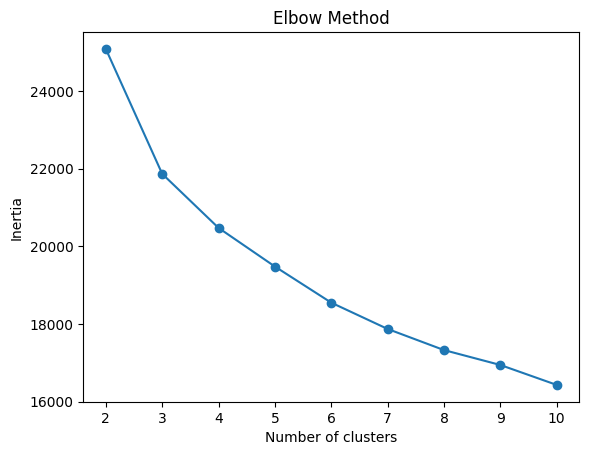

In [9]:
plt.plot(range(2,11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=6, random_state=42)
clusters_km = kmeans.fit_predict(X_scaled)
print("Silhouette Score K-Means:", silhouette_score(X_scaled, clusters_km))

Silhouette Score K-Means: 0.15889103446933253


# 06. Agglomerative Clustering

In [11]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

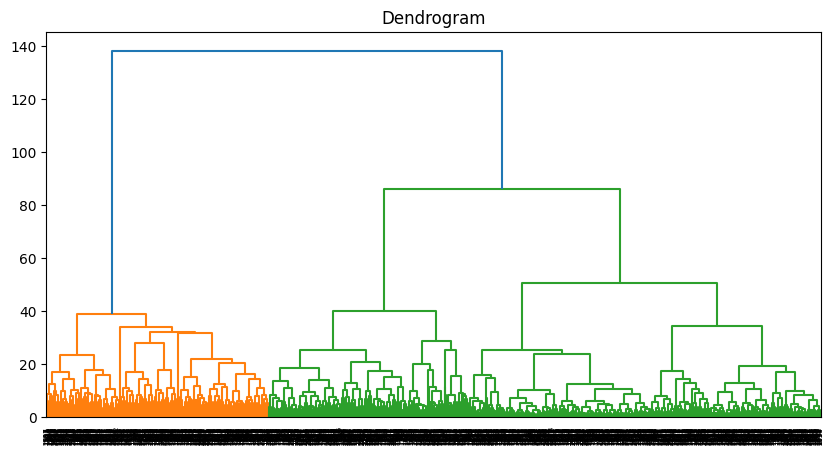

In [12]:
plt.figure(figsize=(10,5))
dend = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram')
plt.show()

In [13]:
agg = AgglomerativeClustering(n_clusters=6)
clusters_agg = agg.fit_predict(X_scaled)
print("Silhouette Score Agglomerative:", silhouette_score(X_scaled, clusters_agg))

Silhouette Score Agglomerative: 0.1310617696173229


# 07. Analysing

In [14]:
data['Cluster_KMeans'] = clusters_km
data['Cluster_Agg'] = clusters_agg

numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

data.groupby('Cluster_KMeans')[numeric_cols].mean()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Cluster_Agg
Cluster_KMeans,,,,,,,,,,,,,,,,,,,,,
0,4989.823529,1968.447059,49744.700599,0.894118,0.894118,48.129412,304.658824,12.864706,102.970588,20.723529,...,0.064706,0.100000,0.005882,0.035294,0.005882,0.005882,3.0,11.0,0.217647,1.600000
1,5641.510242,1978.707635,29295.471805,0.871508,0.003724,48.031657,29.567970,6.158287,24.960894,9.162011,...,0.089385,0.001862,0.000000,0.001862,0.000000,0.011173,3.0,11.0,0.122905,2.858473
2,5576.498084,1969.831418,74286.201550,0.057471,0.245211,48.065134,519.199234,105.402299,422.195402,129.854406,...,0.084291,0.072797,0.191571,0.191571,0.007663,0.007663,3.0,11.0,0.233716,3.272031
3,5683.632911,1967.674051,78951.863057,0.044304,0.050633,50.968354,647.870253,38.446203,483.487342,75.335443,...,0.069620,0.155063,0.300633,0.218354,0.044304,0.009494,3.0,11.0,0.300633,2.183544
4,5700.522222,1963.802222,61023.914989,0.055556,0.946667,48.082222,541.846667,26.260000,153.522222,33.360000,...,0.080000,0.146667,0.037778,0.040000,0.024444,0.006667,3.0,11.0,0.115556,3.888889
5,5596.735178,1963.045455,41471.763052,0.634387,0.936759,50.873518,57.464427,3.847826,21.737154,5.739130,...,0.047431,0.029644,0.000000,0.000000,0.003953,0.011858,3.0,11.0,0.045455,0.403162
